# import

In [6]:
from Utilities.utils import *

# Get the current working directory
current_working_dir = os.getcwd()
current_working_dir = '//'.join(current_working_dir.split('\\')[0:-1]) + r'//data/f5//'


dark_pink = '#BE575F'
dark_blue = '#232C56'

# figure B

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_45800\2204128193.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")
100%|██████████| 10000/10000 [00:19<00:00, 508.03it/s]


(0.0, 4000.0)

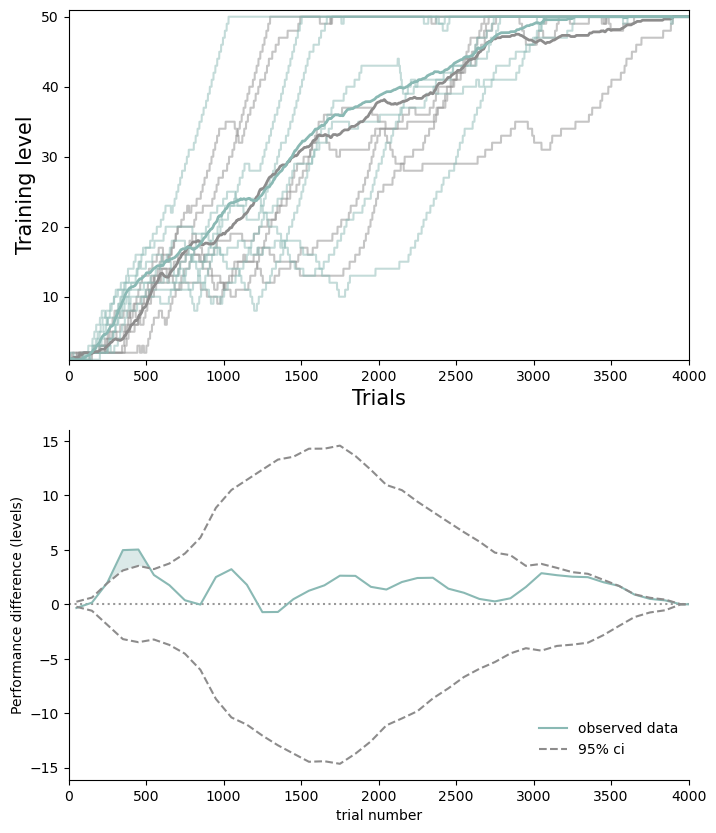

In [31]:
# Read CSV
pl_data = pd.read_csv(current_working_dir + 'hippocampus_learning_curves.csv')

# Extract data
categories = pl_data.catagory.values
animals = pl_data.animal.values
t_levels = parse_training_levels(pl_data.training_levels.values)

# Define masks & calculate mean and std for lesion and control groups
lesion_mask = categories == 'lesion'
lesion_MeanLearningCurve, lesion_std = calculate_mean_std(t_levels, lesion_mask)
control_mask = categories == 'control'
control_MeanLearningCurve, control_std = calculate_mean_std(t_levels, control_mask)

# Plot
window = 10
xlim = 4000
fig, [ax,ax1] = plt.subplots(2,1, figsize=(8, 10))
for item in np.array(t_levels)[control_mask]:
    ax.plot(item, color = "#8D8C8C",alpha = 0.5)
for item in np.array(t_levels)[lesion_mask]:
    ax.plot(item, color = '#8AB9B4',alpha = 0.5)
ax.plot(convolve_movmean(control_MeanLearningCurve[:xlim], window), '-', color="#8D8C8C", linewidth=2,label = 'control')
ax.plot(convolve_movmean(lesion_MeanLearningCurve[:xlim], window), '-', color="#8AB9B4", linewidth=2, label = 'lesion')
ax.set_xlabel('Trials', fontsize=15)
ax.set_ylabel('Training level', fontsize=15)
ax.set_xlim([0, xlim])
ax.set_ylim([1, 51])
plt.legend(loc="upper left")

##### PLOT 2

# shuffle groups (permute 10000 times)
real_data, shrdf = shuffle_data(t_levels,animals,categories)

# get 95% ci
pos_ci = shrdf.groupby('TrialIndexBinned').quantile(.95)
neg_ci = shrdf.groupby('TrialIndexBinned').quantile(.05)

# plot
ax1.axhline(0, ls='dotted', alpha=0.4, color='k')
ax1.plot(real_data, color='#8AB9B4', label='observed data')
ax1.plot(pos_ci, linestyle='--', color='#8D8C8C', label='95% ci')
ax1.plot(neg_ci, linestyle='--', color='#8D8C8C')
x = pos_ci.reset_index().TrialIndexBinned
y1 = pos_ci.reset_index().Performance
y2 = real_data.reset_index().Performance
ax1.fill_between(x, y1, y2, where=y2 >= y1, facecolor='#8AB9B4', alpha=.3, interpolate=True)
ax1.set_ylabel('Performance difference (levels)')
ax1.set_xlabel('trial number')
plt.legend(loc=(0.75, 0.05), frameon=False)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim((0, 4000))

# figure C

need to add the new probes to this figure! 

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_45800\1854499526.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a, fontsize=18)
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_45800\1854499526.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(a, fontsize=18)


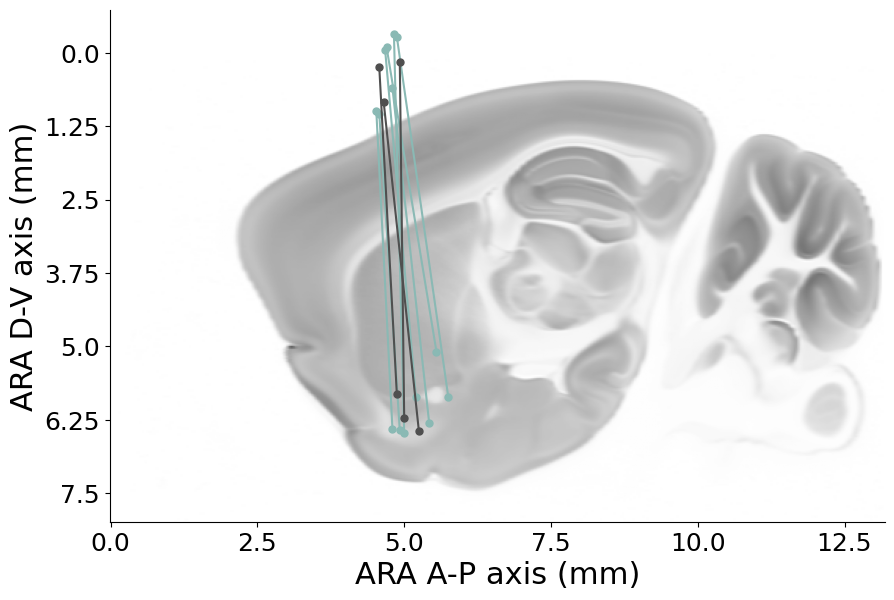

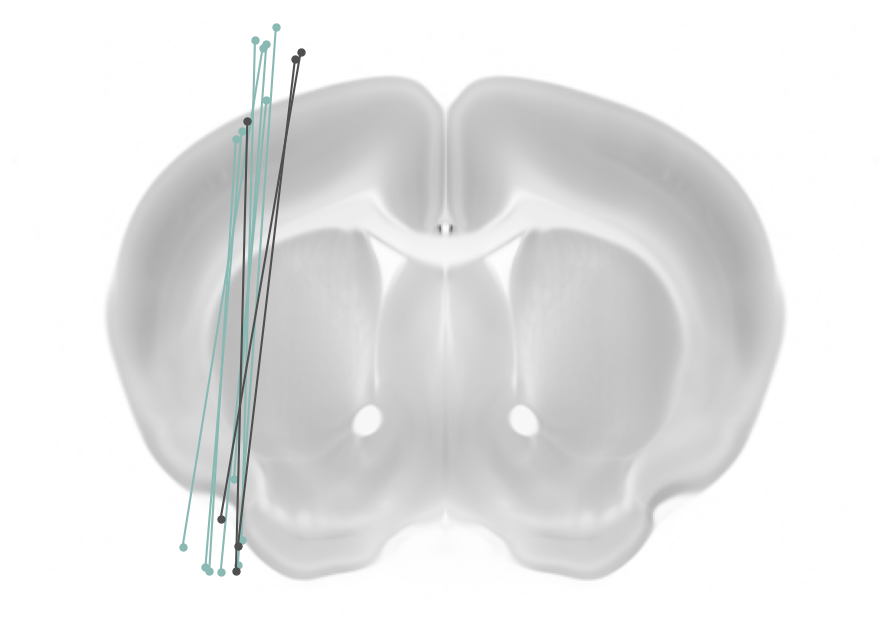

In [34]:
coords = pd.read_csv(current_working_dir+'probe_positions.txt', header=0)

# add the striatum limits
z_limits = [190, 200]
y_limits = [60, 271]
colours_ = ['buffer','#8AB9B4','#1A79B6','#4F4F4F','k']

# select number of slices to show, rows and cols
n_images = 1
rows = 1
cols = 1

fp = Path(current_working_dir+'probe_positions.txt')
parent = fp.parent

# read the file of points
X1 = coords.x1
Y1 = coords.y1
Z1 = coords.z1
X2 = coords.x2
Y2 = coords.y2
Z2 = coords.z2
Animal_Name = coords.Mouse_name

# select only the fibers used in the analysis
X1 = np.array(list(X1)).astype(float)
Y1 = np.array(list(Y1)).astype(float)
Z1 = np.array(list(Z1)).astype(float)
X2 = np.array(list(X2)).astype(float)
Y2 = np.array(list(Y2)).astype(float)
Z2 = np.array(list(Z2)).astype(float)
Animal_Name = np.array(list(Animal_Name))

# read atlas get slice numbers
atlas = Image.open(current_working_dir +'reference_25um_inverted.tif')
h,w = np.shape(atlas)
# decide on the number of images
step = int(np.floor((z_limits[1] - z_limits[0]) / n_images))
sl_list = list(range(z_limits[0], z_limits[1], step))
sl_list = sl_list[-n_images:]

# Mirror all to the right hemisphere
atlas_mid_point = w/2
for i in range(len(X1)):
    if X1[i] > atlas_mid_point:
        dist_to_center = atlas_mid_point - X1[i]
        X1[i] = atlas_mid_point + dist_to_center
for i in range(len(X2)):
    if X2[i] > atlas_mid_point:
        dist_to_center = atlas_mid_point - X2[i]
        X2[i] = atlas_mid_point + dist_to_center
        
for i in range(len(X1)):
    X1[i] = X1[i]-7
for i in range(len(Y2)):
    X2[i] = X2[i]-7

groups = list(coords.group.values)

# make the plot
fig, ax = plt.subplots(1, 1, figsize=[10,10])
# show striatum outline
str_im = Image.open(current_working_dir+'sagtial_reference_25um_inverted.tif')
ax.imshow(str_im, cmap='gray',alpha = 0.6)

for i in range(len(X1)):
    new_point = extend_line((Z1[i],Z2[i]),(Y1[i],Y2[i]),'positive')
    if groups[i] in [1,3]:
        ax.plot(new_point[0], new_point[-1], 'o-', color=colours_[groups[i]],
                alpha=1, markersize=5, markeredgewidth=1)

a=ax.get_xticks().tolist()
a= [25 * a[i] / 1000 for i in range(len(a))]
ax.set_xticklabels(a, fontsize=18)
a=ax.get_yticks().tolist()
a= [25 * a[i] / 1000 for i in range(len(a))]
ax.set_yticklabels(a, fontsize=18)
ax.set_xlabel('ARA A-P axis (mm)', fontsize=22)
ax.set_ylabel('ARA D-V axis (mm)', fontsize=22)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(parent / 'sideview_plot.pdf',
            transparent=True, bbox_inches='tight')

# plot the fibers in the slices
fig2, axs = plt.subplots(rows, cols, figsize=[cols * w/50, rows * h/50])

for c,i in enumerate(sl_list):
    atlas.seek(i)
    axs.imshow(atlas, cmap='gray',alpha = 0.6)
    axs.axis('off')
# fig2.subplots_adjust(wspace=0, hspace=0)
fig2.tight_layout()

# plot the fibers
for c,x in enumerate(Z1):
    # find the index of the slice that this point is closest to
    templist = [np.abs(b - x) for b in sl_list]
    idx = np.argmin(templist)
    new_point = extend_line((X1[c],X2[c]),(Y1[c],Y2[c]),'positive')
    if groups[c] in [1,3]:
        axs.plot(new_point[0], new_point[-1], 'o-', color=colours_[groups[c]],
                alpha=1, markersize=5, markeredgewidth=1)

# figure D


LOADING processed_spike_data

LOADING DLC TRACKING DATA
back_2023-05-21T16_40_37DLC_resnet50_port-tracking_back_viewMay2shuffle1_500000.h5
back_2023-05-21T16_40_37DLC_resnet50_Yellow-floor-task-tracking-backviewApr9shuffle1_800000.h5
side_2023-05-21T16_40_37DLC_resnet50_port-tracking_side-viewApr29shuffle1_700000.h5
side_2023-05-21T16_40_37DLC_resnet50_task-tracking-sideviewApr15shuffle1_670000.h5
['head_centre' 'implant_centre' 'left_ear' 'right_ear' 'tail_base']
back_2023-05-21T16_40_37DLC_resnet50_port-tracking_back_viewMay2shuffle1_500000.h5
back_2023-05-21T16_40_37DLC_resnet50_Yellow-floor-task-tracking-backviewApr9shuffle1_800000.h5
side_2023-05-21T16_40_37DLC_resnet50_port-tracking_side-viewApr29shuffle1_700000.h5
side_2023-05-21T16_40_37DLC_resnet50_task-tracking-sideviewApr15shuffle1_670000.h5
      A corresponding time span has been found. Time span set to [5900, 6500]

LOADING BEHAV DATA
done


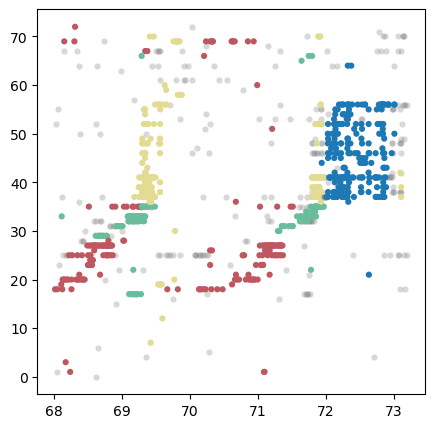

In [36]:

# Get the f3 working directory
f3_working_dir = os.getcwd()
f3_working_dir = '//'.join(f3_working_dir.split('\\')[0:-1]) + r'//data/f3//'

PP_PATH = f3_working_dir + 'ppseq_output_awake\\'
dat_path = current_working_dir + 'example_mouse_data\\'
        
file = find_example_file(PP_PATH)
        
# set tracking path
for file_ in os.listdir(dat_path + r"\video\tracking\\"):
    if 'task' in file_:
        if not 'clock' in file_:
            tracking_path = os.path.join(dat_path + r"\video\tracking\\",file_) + '\\'
            
                                
data = Load_example_data(PP_PATH, file, tracking_path, dat_path)
timeframe = [68,73.2]
neuron_index = pd.read_pickle(PP_PATH + file + r"\analysis_output\reordered_recolored\\" + 'neuron_index')
colors = pd.read_pickle(PP_PATH + file + r"\analysis_output\reordered_recolored\\" + 'colors')

# plot zoomed example
plot_zoomed_example_raster(data,colors,neuron_index,timeframe)

# figure F

# figure G

# figure H

# figure I

# figure J

# figure K

# figure L

# figure M

# figure N